`Accuracy Evaluation`

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
# Load dataset
df = pd.read_csv("HIHD.csv")

# Select relevant features based on the rule-based approach
features = ["smv", "ax_std", "ay_std", "az_std"]
X = df[features]
y = df["label"]

In [5]:
# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train decision tree model
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [6]:
# Print evaluation metrics
print(f"✅ Decision Tree Accuracy: {accuracy:.4f}")
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))

✅ Decision Tree Accuracy: 0.9143

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.91      0.94        55
           1       0.74      0.93      0.82        15

    accuracy                           0.91        70
   macro avg       0.86      0.92      0.88        70
weighted avg       0.93      0.91      0.92        70



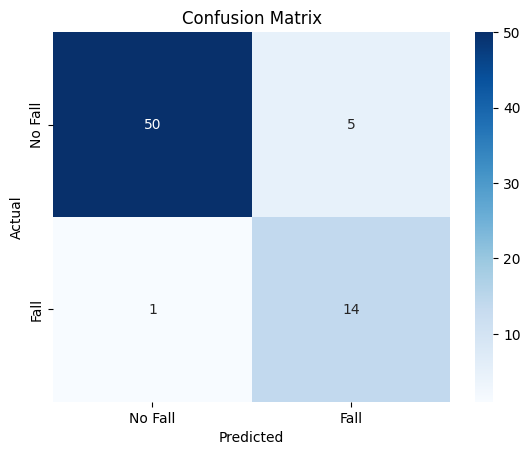

In [7]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Fall", "Fall"], yticklabels=["No Fall", "Fall"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

`Data Visualization`

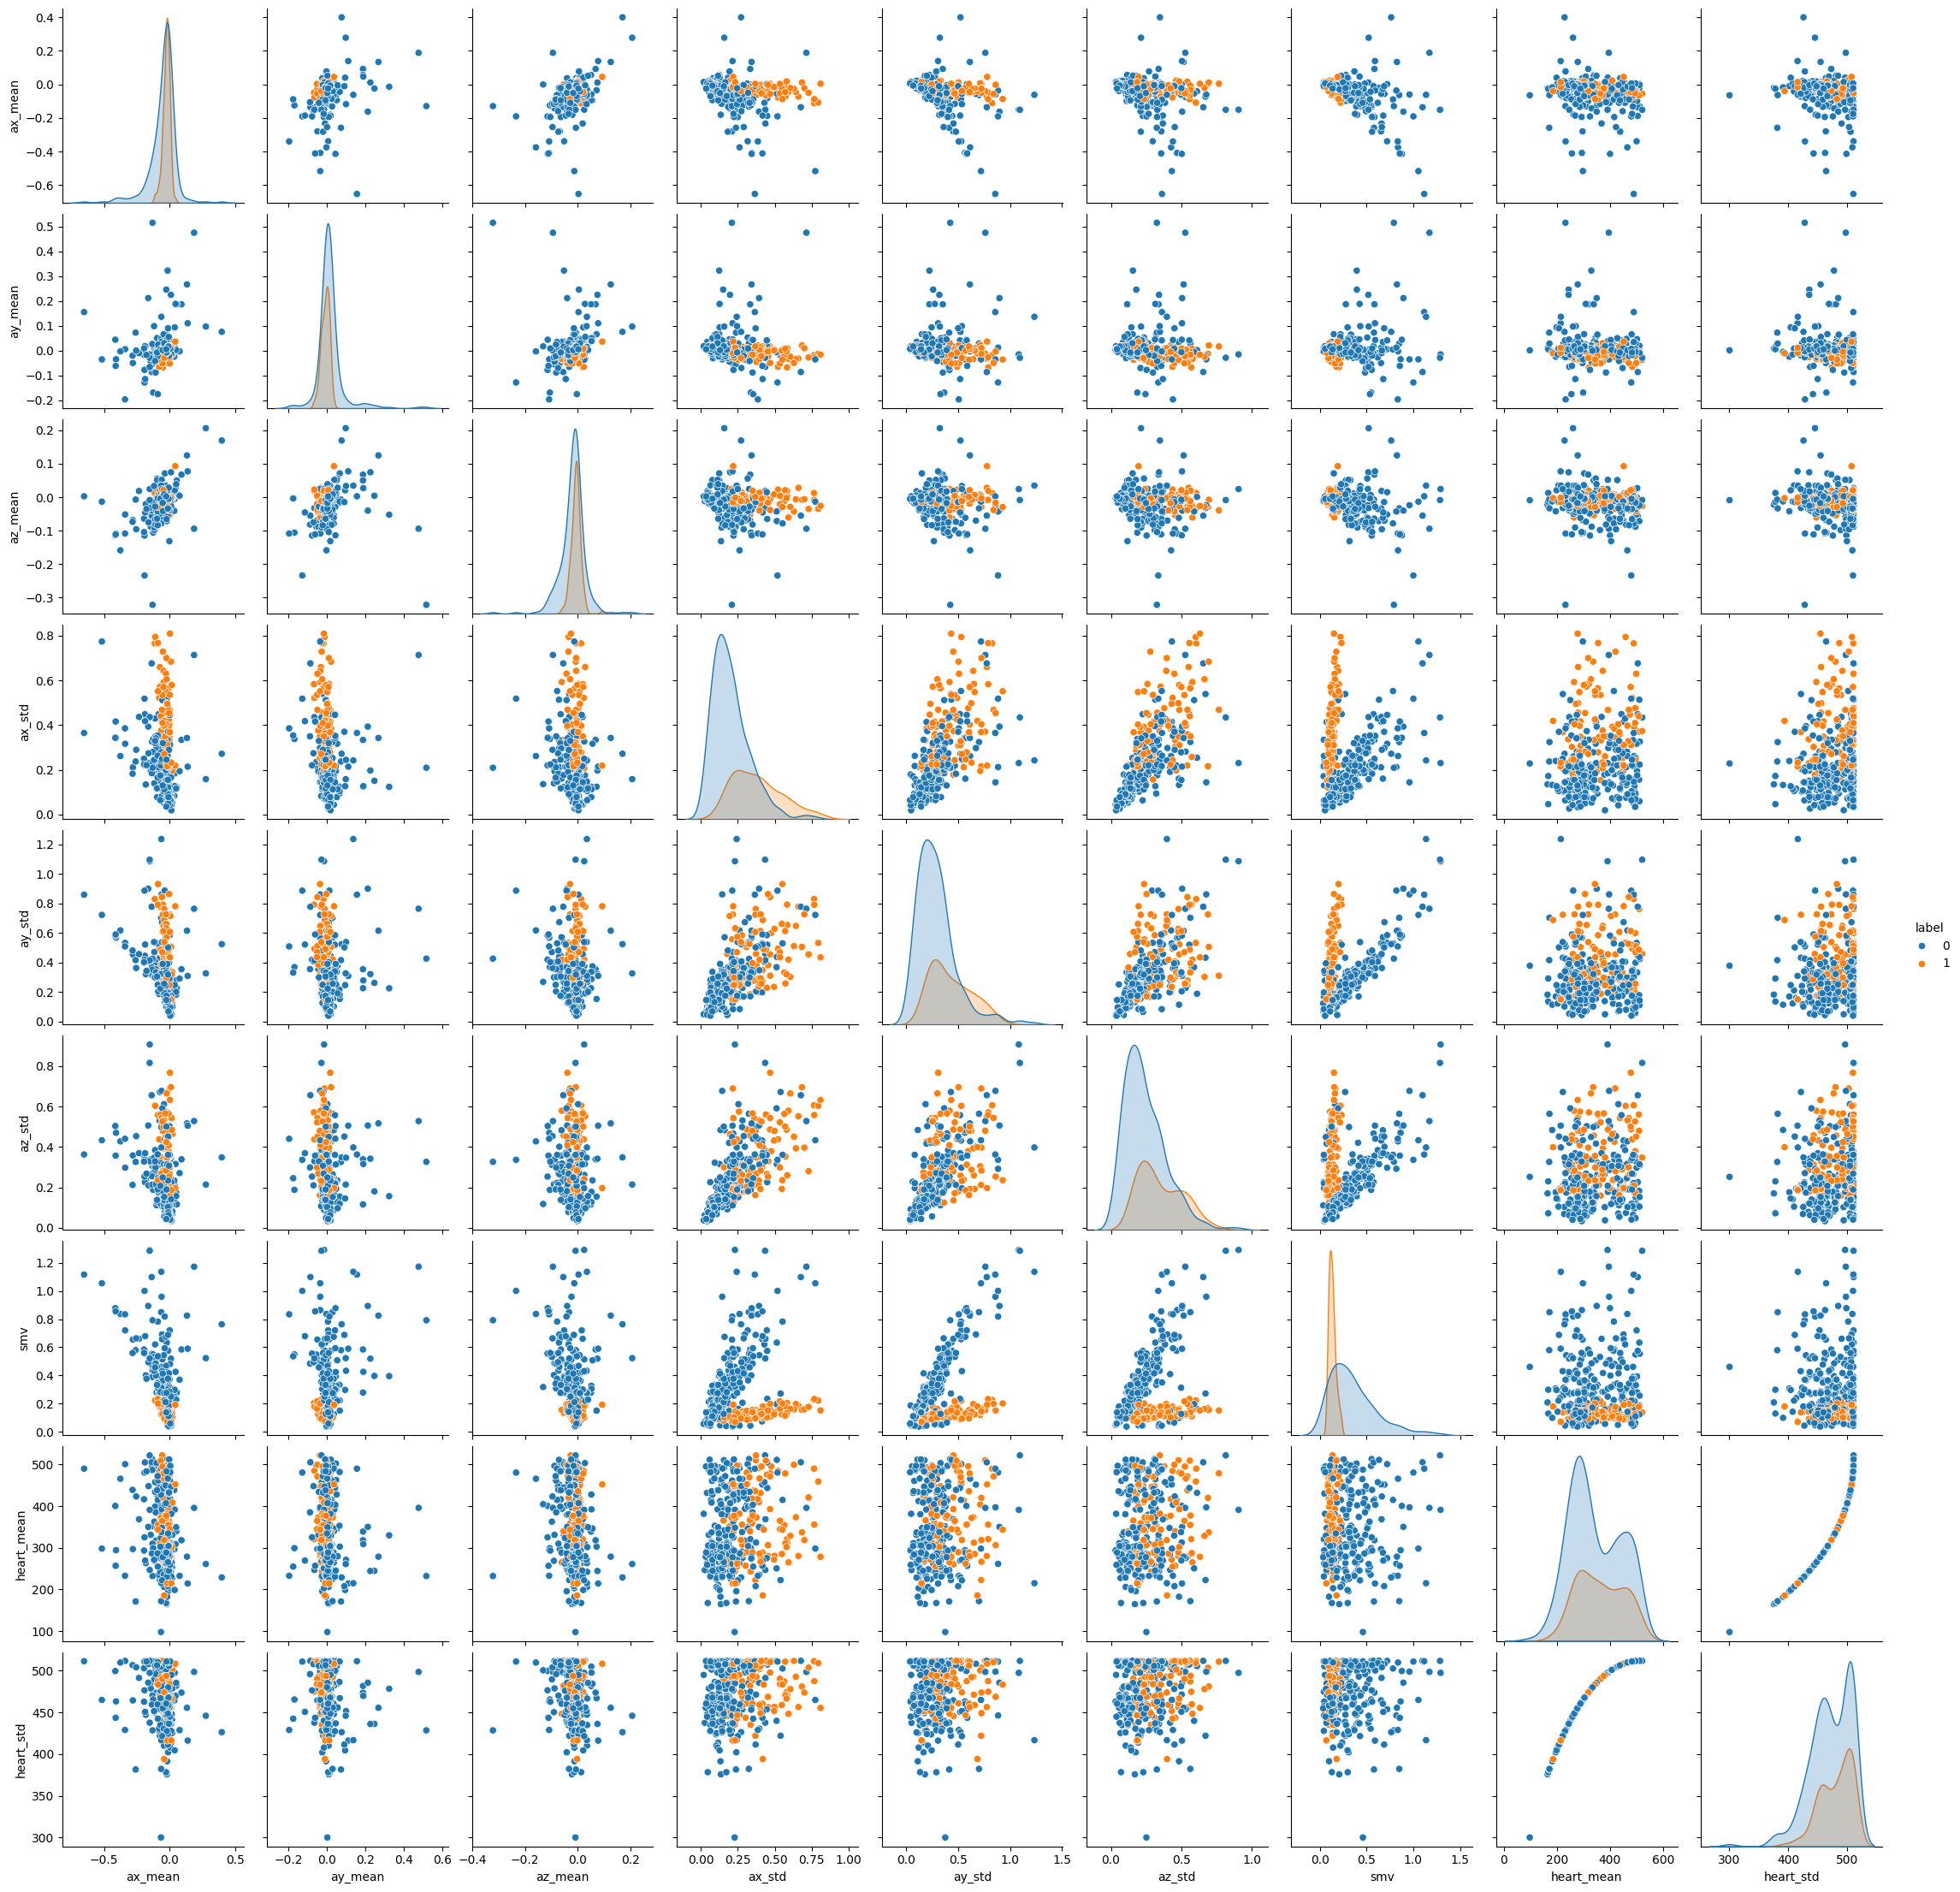

In [8]:
# 1️⃣ Dataset Overview
sns.pairplot(df, hue="label", diag_kind="kde")
plt.show()

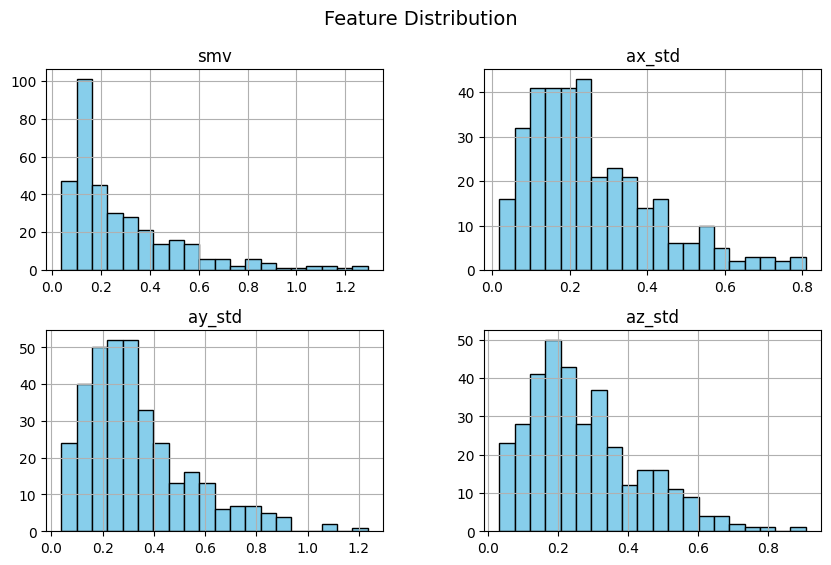

In [9]:
# 2️⃣ Feature Distribution
df[features].hist(figsize=(10, 6), bins=20, color="skyblue", edgecolor="black")
plt.suptitle("Feature Distribution", fontsize=14)
plt.show()

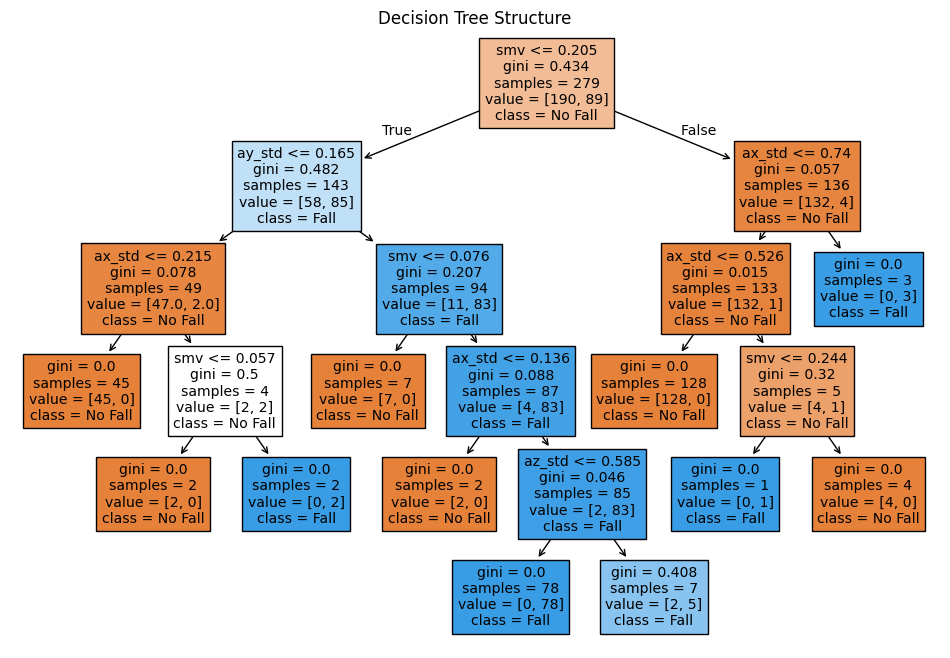

In [10]:
# 3️⃣ Decision Tree Structure
plt.figure(figsize=(12, 8))
plot_tree(dt_model, feature_names=features, class_names=["No Fall", "Fall"], filled=True)
plt.title("Decision Tree Structure")
plt.show()

In [11]:
# 4️⃣ Train Random Forest for Comparison
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# 5️⃣ Compare Decision Tree vs. Random Forest
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")

Random Forest Accuracy: 0.9429


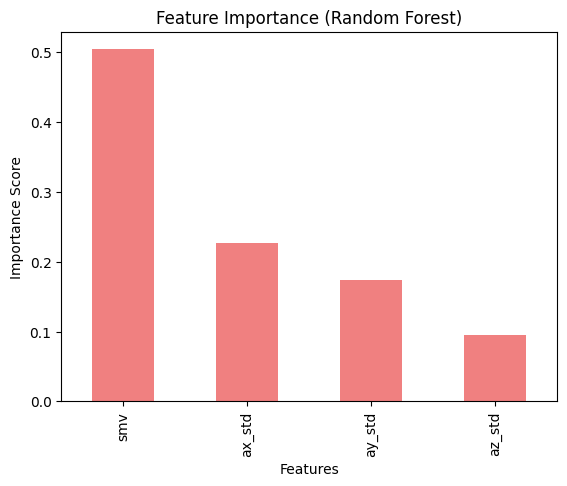

In [12]:
# 6️⃣ Feature Importance from Random Forest
feature_importance = pd.Series(rf_model.feature_importances_, index=features).sort_values(ascending=False)
feature_importance.plot(kind="bar", color="lightcoral")
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()

`Prediction using Unseen Data`

In [13]:
import numpy as np

# Define some hypothetical unseen test cases (assumed based on dataset patterns)
unseen_data = pd.DataFrame({
    "smv": [-0.85, -0.50, 0.30, 1.20, -0.65],
    "ax_std": [0.15, -0.40, 0.75, 1.10, -0.10],
    "ay_std": [-0.90, 0.20, 0.50, -0.30, 0.85],
    "az_std": [-1.00, 0.60, -0.10, 1.50, -0.25],
})

In [14]:
# Make predictions using the trained decision tree model
unseen_predictions = dt_model.predict(unseen_data)

# Add predictions to the dataframe
unseen_data["Predicted_Label"] = unseen_predictions

In [15]:
# Convert predicted labels to "Fall" (1) or "No Fall" (0)
unseen_data["Predicted_Label"] = unseen_data["Predicted_Label"].map({0: "No Fall", 1: "Fall"})

# Display predictions
print("🔍 Predictions for Unseen Data:")
print(unseen_data)

🔍 Predictions for Unseen Data:
    smv  ax_std  ay_std  az_std Predicted_Label
0 -0.85    0.15   -0.90   -1.00         No Fall
1 -0.50   -0.40    0.20    0.60         No Fall
2  0.30    0.75    0.50   -0.10            Fall
3  1.20    1.10   -0.30    1.50            Fall
4 -0.65   -0.10    0.85   -0.25         No Fall


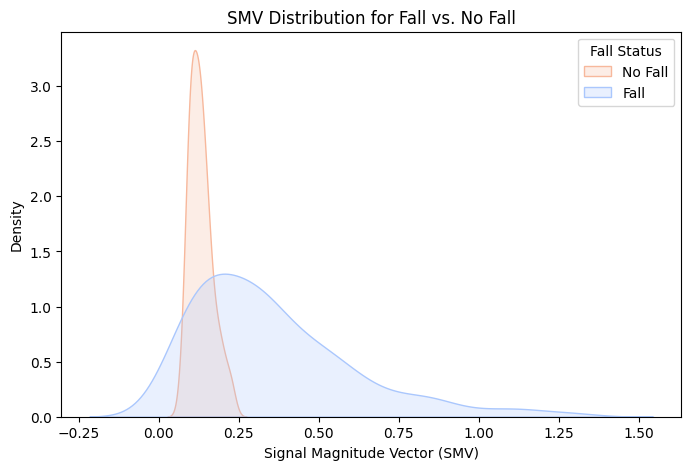

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a histogram with KDE for Fall vs. No Fall
plt.figure(figsize=(8, 5))

sns.kdeplot(data=df, x="smv", hue="label", fill=True, palette="coolwarm")
plt.title("SMV Distribution for Fall vs. No Fall")
plt.xlabel("Signal Magnitude Vector (SMV)")
plt.ylabel("Density")
plt.legend(title="Fall Status", labels=["No Fall", "Fall"])
plt.show()